In [15]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Day 35 Lecture 2 Assignment

In this assignment, we will combine what we have learned so far about classification algorithms this week.

In [27]:
import warnings

import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    fbeta_score,
    make_scorer,
)
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# p much in practice:
# *if you want to use GradientBoostingClassifier
#     * use XGBClassifier instead
# *if you want to use GradientBoostingRegressor
#     * use XGBRegressor instead
from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

In [5]:
admission = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Admission_Predict.csv')

In [6]:
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In this assignment, we will predict the probability of a student being admitted to a PhD program given their stats. To make the predictions, find the median for the Chance of Admit column. Create an admit column where all probabilities above the median will receive a 1 for that column and all probabilities below the median will be a zero.

Below you will process and clean the data, try the SVM classifier, the gradient boosted decision tree classifier and XGBoost, and compare your results.

Have fun!

In [11]:
chance_med = admission['Chance of Admit '].median()
admission['high_chance'] = (admission['Chance of Admit '] > chance_med).astype(int)


In [13]:
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,high_chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

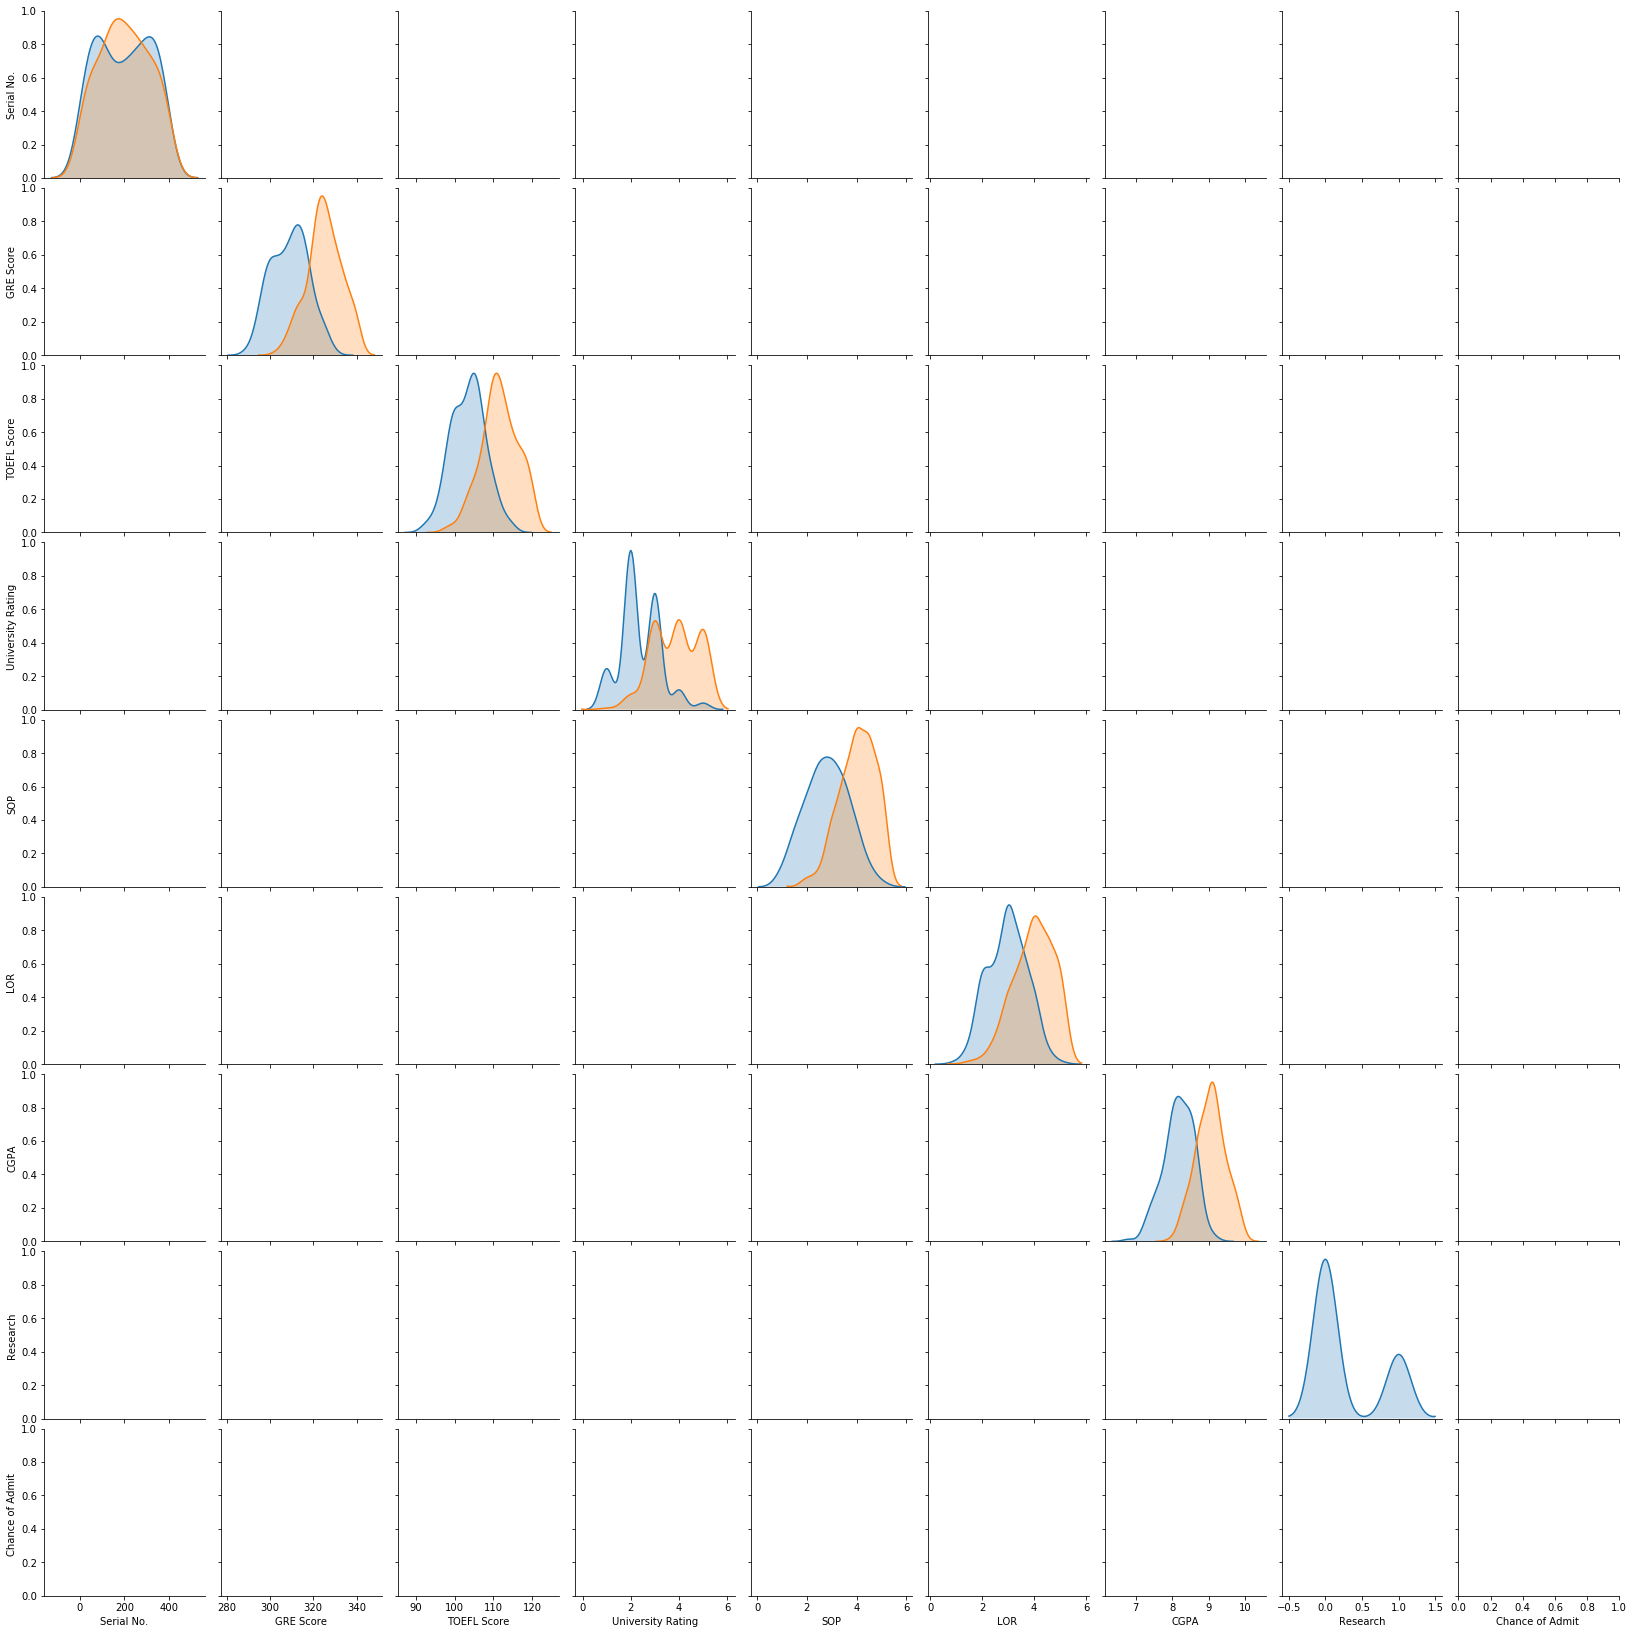

<IPython.core.display.Javascript object>

In [31]:
sns.pairplot(admission, hue="high_chance")

In [19]:
admission.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
high_chance          0
dtype: int64

<IPython.core.display.Javascript object>

In [20]:
X = admission.drop(columns=["high_chance", "Chance of Admit ", "Serial No."])
y = admission["high_chance"]

<IPython.core.display.Javascript object>

In [22]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


<IPython.core.display.Javascript object>

In [25]:
X["CGPA"].value_counts()

8.00    9
8.76    8
8.56    7
8.45    6
8.64    6
       ..
9.35    1
9.62    1
9.56    1
8.92    1
8.09    1
Name: CGPA, Length: 168, dtype: int64

<IPython.core.display.Javascript object>

In [26]:
num_cols = [
    "GRE Score",
    "TOEFL",
    "SOP",
    "LOR",
    "CGPA",
]

bin_cols = ["Research"]

<IPython.core.display.Javascript object>

In [29]:
y.value_counts()

0    209
1    191
Name: high_chance, dtype: int64

<IPython.core.display.Javascript object>

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, )

<IPython.core.display.Javascript object>

In [32]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [33]:
model.score(X_train, y_train)

1.0

<IPython.core.display.Javascript object>

In [34]:
model.score(X_test, y_test)

0.85

<IPython.core.display.Javascript object>

In [42]:
grid = {
    "learning_rate": [0.01, 0.1, 0.5],
    "n_estimators": [10, 25, 50, 100, 150],
    "max_features": [0.5, 0.7, 0.9],
    "subsample": [0.7, 0.9],
    "max_depth": [3, 5],
}

model_cv = GridSearchCV(XGBClassifier(), grid, cv=3, n_jobs=-1, verbose=1)

<IPython.core.display.Javascript object>

In [43]:
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.3s


[15:16:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    3.6s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             

<IPython.core.display.Javascript object>

In [44]:
model_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 0.5,
 'n_estimators': 50,
 'subsample': 0.7}

<IPython.core.display.Javascript object>

In [39]:
model_cv.best_estimator_.feature_importances_

array([0.15002553, 0.0765474 , 0.1065537 , 0.08108237, 0.08886837,
       0.40541333, 0.0915093 ], dtype=float32)

<IPython.core.display.Javascript object>

In [41]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


<IPython.core.display.Javascript object>

In [46]:
y_pred = model_cv.predict(X_test)

<IPython.core.display.Javascript object>

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.93      0.90      0.92        42

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



<IPython.core.display.Javascript object>